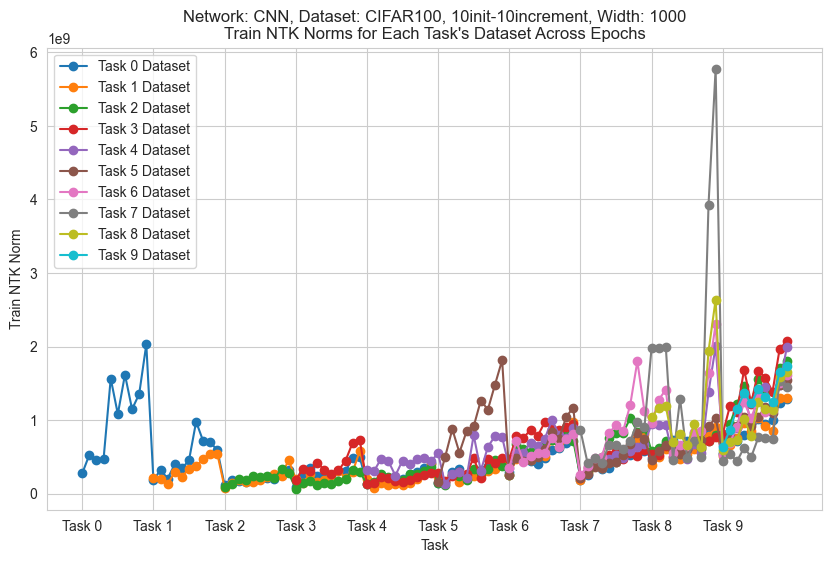

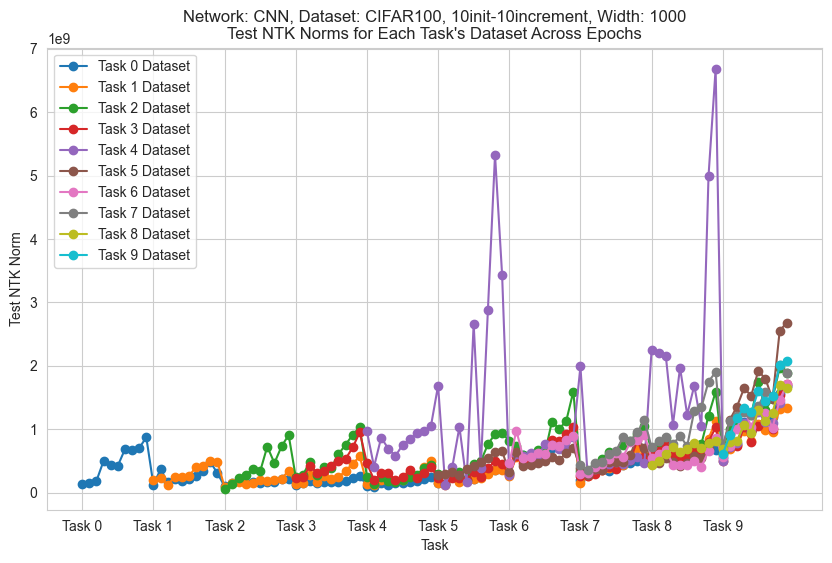

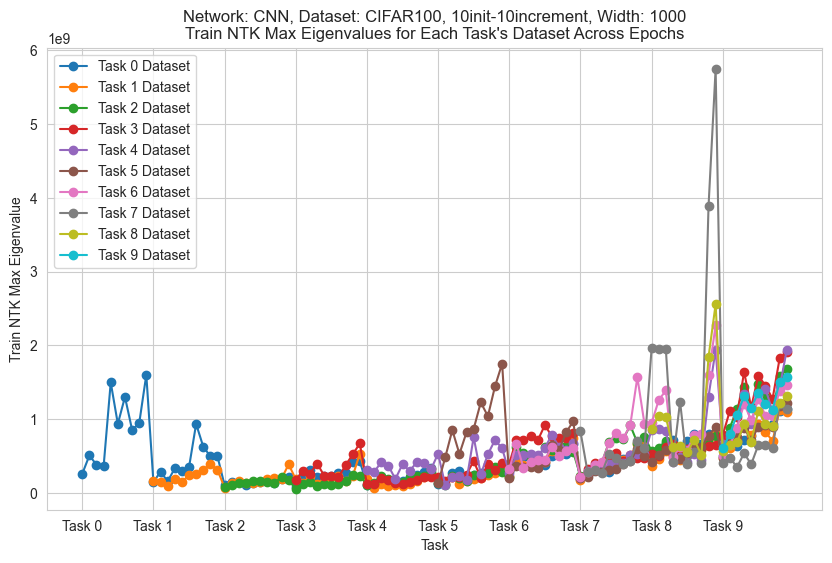

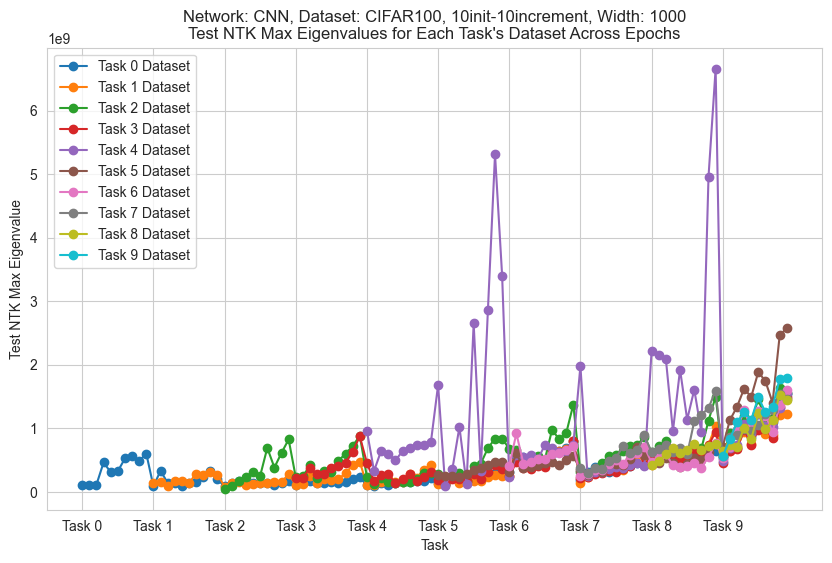

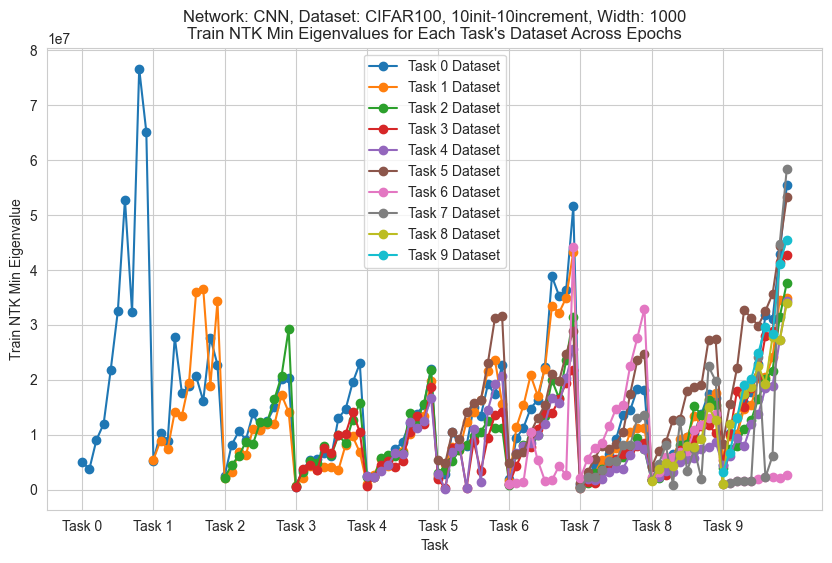

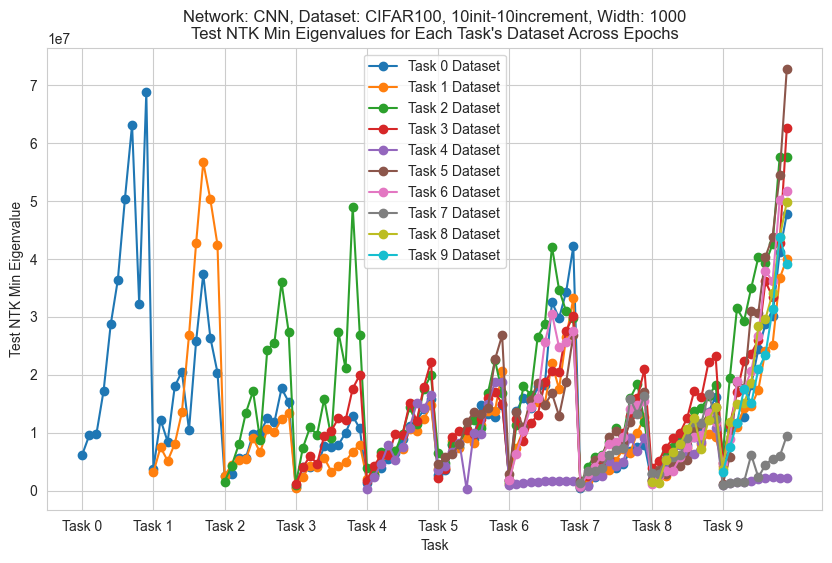

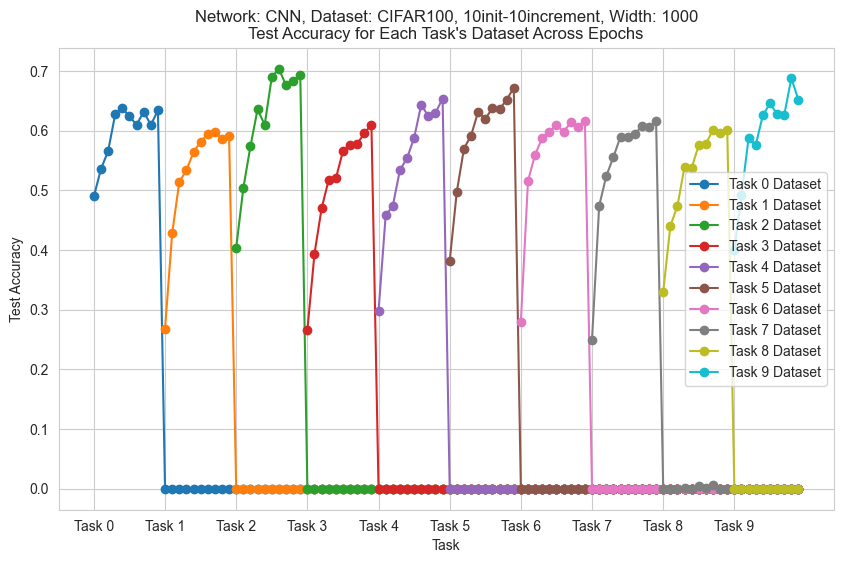

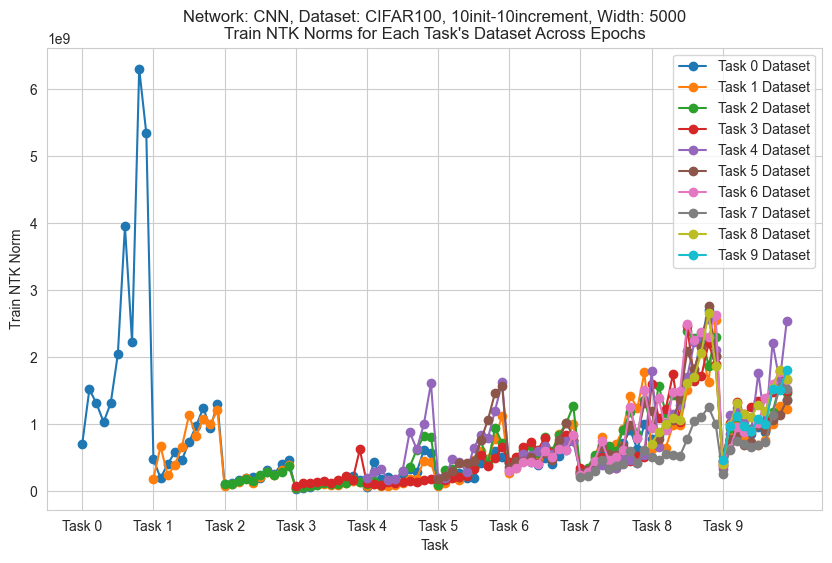

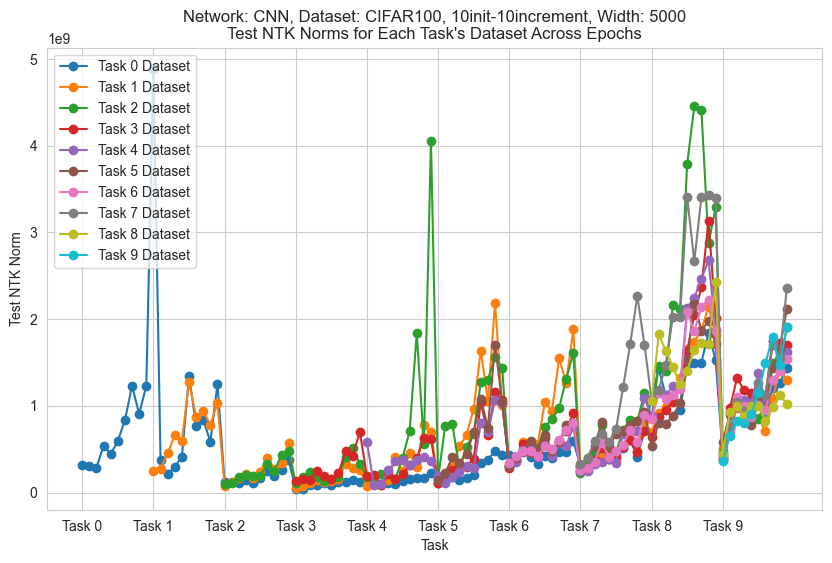

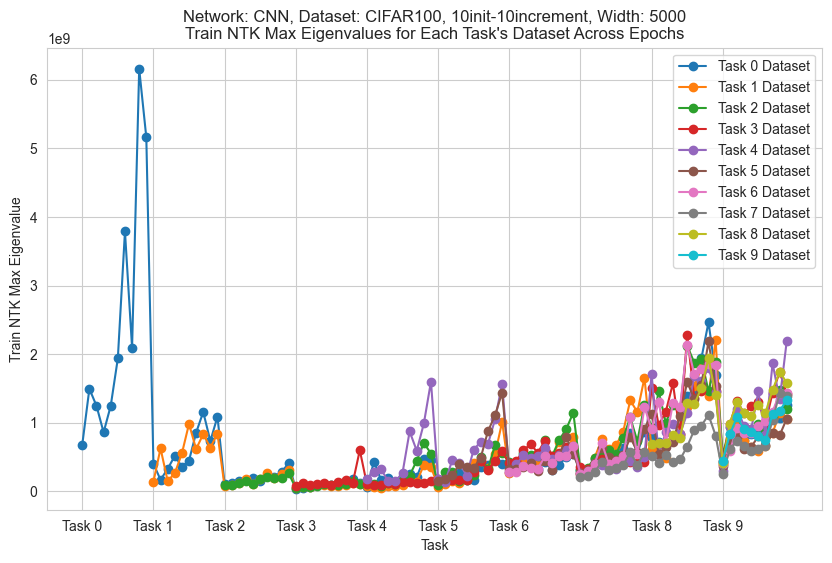

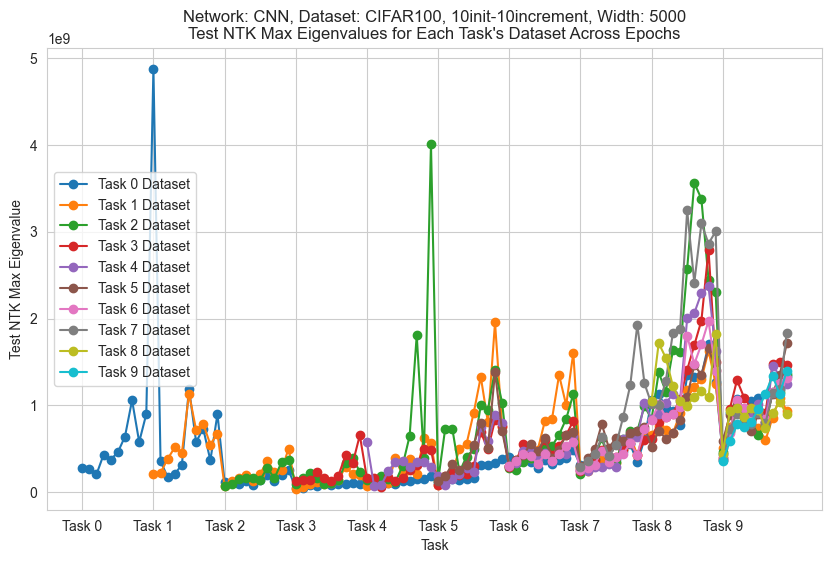

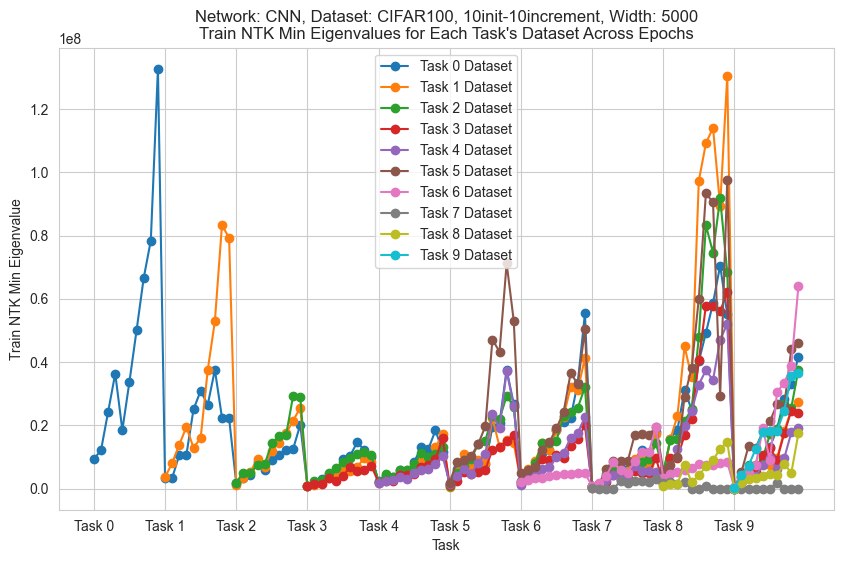

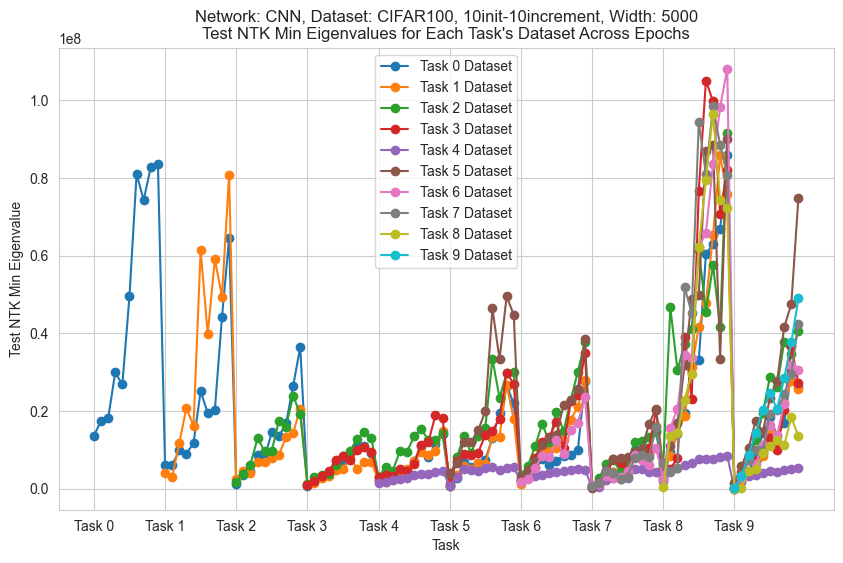

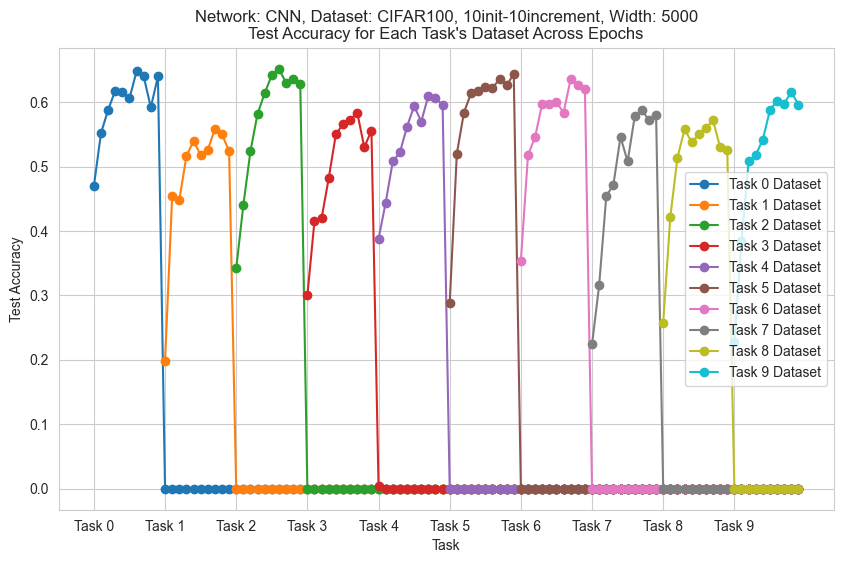

In [5]:
#Graph with numerics
import pickle
import matplotlib.pyplot as plt
import numpy as np

with open("cnn_cifar100_10_10_10epo_cuda.pkl", "rb") as file:
    metrics = pickle.load(file)
    
# with open("cnn_cifar100_replay_10_10_10epo_cuda.pkl", "rb") as file:
#     metrics = pickle.load(file)

def plot_ntk_metrics(ntk_metrics, title, ylabel, epochs_per_task):
    plt.figure(figsize=(10, 6))
    colors = plt.cm.tab10(np.linspace(0, 1, len(ntk_metrics)))  
    for t in range(len(ntk_metrics)):
        ntk_metrics_task = ntk_metrics[t]

        x_values = range(t * epochs_per_task, len(ntk_metrics_task) + t * epochs_per_task)
        y_values = ntk_metrics_task

        plt.plot(x_values, y_values, marker='o', label=f'Task {t} Dataset', color=colors[t])

    xticks = np.arange(0, len(ntk_metrics_task) + (len(ntk_metrics) - 1) * epochs_per_task, epochs_per_task)
    xticklabels = [f"Task {i}" for i in range(len(xticks))]
    plt.xticks(xticks, xticklabels)

    plt.xlabel('Task')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

network = "CNN"
dataset = "CIFAR100"
increment = "10-10-10"

for width, data in metrics[network][dataset][increment].items():
    if data["train_ntk_matrices"]:
        train_ntk_matrices = data["train_ntk_matrices"]
        test_ntk_matrices = data["test_ntk_matrices"]
        task_accuracies = data["task_accuracies"]

        def calculate_ntk_metrics(ntk_matrices):
            norms = []
            max_eigenvalues = []
            min_eigenvalues = []
            for task_ntk_matrices in ntk_matrices:
                task_norms = []
                task_max_eigenvalues = []
                task_min_eigenvalues = []
                for ntk_matrix in task_ntk_matrices:
                    task_norms.append(np.linalg.norm(ntk_matrix, ord='fro'))
                    eigenvalues = np.linalg.eigvalsh(ntk_matrix)
                    task_max_eigenvalues.append(eigenvalues[-1])
                    task_min_eigenvalues.append(eigenvalues[0])
                norms.append(task_norms)
                max_eigenvalues.append(task_max_eigenvalues)
                min_eigenvalues.append(task_min_eigenvalues)
            return norms, max_eigenvalues, min_eigenvalues

        train_ntk_norms, train_ntk_max_eigenvalues, train_ntk_min_eigenvalues = calculate_ntk_metrics(train_ntk_matrices)
        test_ntk_norms, test_ntk_max_eigenvalues, test_ntk_min_eigenvalues = calculate_ntk_metrics(test_ntk_matrices)

        base_title = f"Network: {network}, Dataset: {dataset}, 10init-10increment, Width: {width}"

        plot_ntk_metrics(train_ntk_norms, 
                         title=f"{base_title}\nTrain NTK Norms for Each Task's Dataset Across Epochs", 
                         ylabel='Train NTK Norm', 
                         epochs_per_task=10)
        plot_ntk_metrics(test_ntk_norms, 
                         title=f"{base_title}\nTest NTK Norms for Each Task's Dataset Across Epochs", 
                         ylabel='Test NTK Norm', 
                         epochs_per_task=10)

        plot_ntk_metrics(train_ntk_max_eigenvalues, 
                         title=f"{base_title}\nTrain NTK Max Eigenvalues for Each Task's Dataset Across Epochs", 
                         ylabel='Train NTK Max Eigenvalue', 
                         epochs_per_task=10)
        plot_ntk_metrics(test_ntk_max_eigenvalues, 
                         title=f"{base_title}\nTest NTK Max Eigenvalues for Each Task's Dataset Across Epochs", 
                         ylabel='Test NTK Max Eigenvalue', 
                         epochs_per_task=10)

        plot_ntk_metrics(train_ntk_min_eigenvalues, 
                         title=f"{base_title}\nTrain NTK Min Eigenvalues for Each Task's Dataset Across Epochs", 
                         ylabel='Train NTK Min Eigenvalue', 
                         epochs_per_task=10)
        plot_ntk_metrics(test_ntk_min_eigenvalues, 
                         title=f"{base_title}\nTest NTK Min Eigenvalues for Each Task's Dataset Across Epochs", 
                         ylabel='Test NTK Min Eigenvalue', 
                         epochs_per_task=10)

        plot_ntk_metrics(task_accuracies, 
                         title=f"{base_title}\nTest Accuracy for Each Task's Dataset Across Epochs", 
                         ylabel='Test Accuracy', 
                         epochs_per_task=10)